In [1]:
# ! pip install update xarray 
# ! pip install netcdf4
# ! pip install cftime
# ! pip install hdf5
# ! pip install nc_time_axis
! conda config --add channels conda-forge 
! conda install climlab --y

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - climlab


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    attrdict-2.0.1             |             py_0          10 KB  conda-forge
    climlab-0.7.7              |   py38h1f9afd7_3         3.9 MB  conda-forge
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    docopt-0.6.2               |             py_1          14 KB  conda-forge
    libflang-5.0.0             |h6538335_20180525         519 KB  conda-forge
    llvm-meta-5.0.0            |                0           3 KB  conda-forge
    openmp-5.0.

In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import xarray as xr
import cftime
import matplotlib as mpl
import nc_time_axis

In [5]:
data=xr.load_dataset('Control.ann.012021.nc')
data=data.squeeze(dim='time')
data = data.drop('time')


In [6]:
global_ASR = data.FSNT.mean(dim='lon')
weights = np.cos(np.deg2rad(global_ASR.lat))/(np.cos(np.deg2rad(global_ASR.lat)).sum())
global_ASR = (global_ASR * weights ).sum()

global_OLR = data.FLNT.mean(dim='lon')
weights = np.cos(np.deg2rad(global_OLR.lat))/(np.cos(np.deg2rad(global_OLR.lat)).sum())
global_OLR = (global_OLR * weights ).sum()

net = np.float(global_ASR.values - global_OLR.values )
asr= np.float(global_ASR.values) 
olr = np.float(global_OLR.values) 
print('The ASR is {:.2f} w/m2, OLR is {:.2f} w/m2 \n The system is thus approximately in equilibrium as ASR - OLR = {:.2f} is negligable.'.format(asr,olr,net))
                                                                                                                                                                  
                                                                                                                        

The ASR is 238.20 w/m2, OLR is 238.06 w/m2 
 The system is thus approximately in equilibrium as ASR - OLR = 0.14 is negligable.


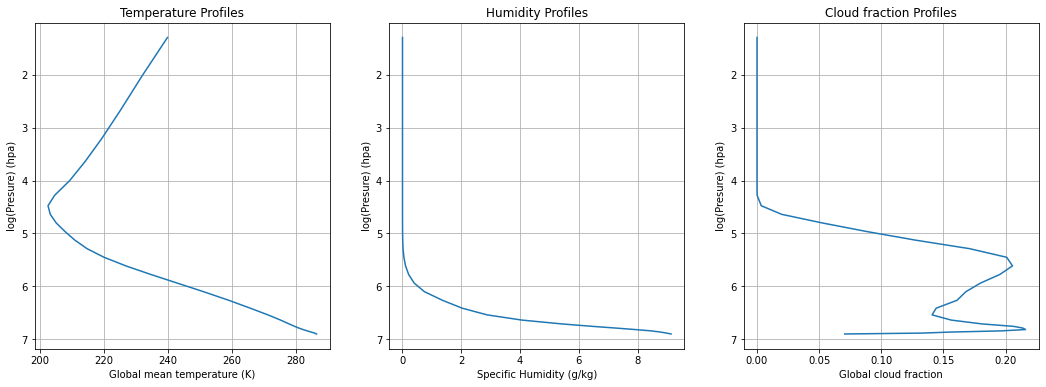

In [7]:
T = data.T.mean(dim='lon')
weights = np.cos(np.deg2rad(T.lat))/(np.cos(np.deg2rad(T.lat)).sum())
T_global= T * weights
T_global= T_global.sum(dim='lat')
T_global = T_global.assign_coords(lev = np.log(T_global.lev) )

Q = data.Q.mean(dim='lon') * 1000
weights = np.cos(np.deg2rad(Q.lat))/(np.cos(np.deg2rad(Q.lat)).sum())
Q_global =  Q * weights
Q_global = Q_global.sum(dim='lat')
Q_global = Q_global.assign_coords(lev = np.log(Q_global.lev) )

C = data.CLOUD.mean(dim='lon') 
weights = np.cos(np.deg2rad(C.lat))/(np.cos(np.deg2rad(C.lat)).sum())
C_global =  C * weights
C_global = C_global.sum(dim='lat')
C_global = C_global.assign_coords(lev = np.log(C_global.lev) )

fig = plt.figure(figsize = (18,6))

ax = plt.subplot(1,3,1)
ax.plot(T_global,T_global.lev)
ax.set_xlabel('Global mean temperature (K)')
ax.set_ylabel('log(Presure) (hpa)')
plt.title('Temperature Profiles')
plt.gca().invert_yaxis()
ax.grid()

ax = plt.subplot(1,3,2)
ax.plot(Q_global,Q_global.lev)
ax.set_xlabel('Specific Humidity (g/kg)')
ax.set_ylabel('log(Presure) (hpa)')
plt.title('Humidity Profiles')
plt.gca().invert_yaxis()
ax.grid()

ax = plt.subplot(1,3,3)
ax.plot(C_global,C_global.lev)
ax.set_xlabel('Global cloud fraction')
ax.set_ylabel('log(Presure) (hpa)')
plt.title('Cloud fraction Profiles')
plt.gca().invert_yaxis()
ax.grid()




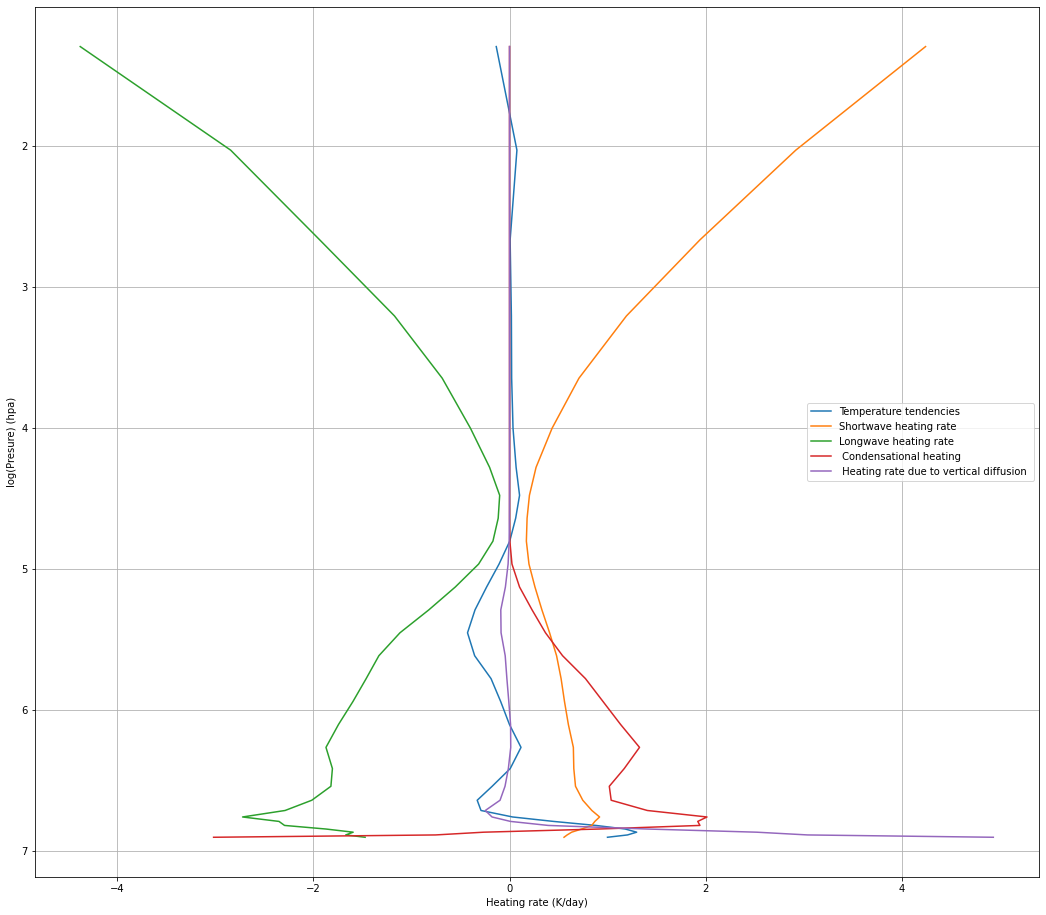

In [8]:
QRL = data.QRL.mean(dim='lon') 
weights = np.cos(np.deg2rad(QRL.lat))/(np.cos(np.deg2rad(QRL.lat)).sum())
QRL_global =  QRL * weights
QRL_global = QRL_global.sum(dim='lat')
QRL_global = QRL_global.assign_coords(lev = np.log(QRL_global.lev) )* 60*60*24


QRS = data.QRS.mean(dim='lon') 
weights = np.cos(np.deg2rad(QRS.lat))/(np.cos(np.deg2rad(QRS.lat)).sum())
QRS_global =  QRS * weights
QRS_global = QRS_global.sum(dim='lat')
QRS_global = QRS_global.assign_coords(lev = np.log(QRS_global.lev) )* 60*60*24


DTCOND = data.DTCOND.mean(dim='lon') 
weights = np.cos(np.deg2rad(DTCOND.lat))/(np.cos(np.deg2rad(DTCOND.lat)).sum())
DTCOND_global =  DTCOND * weights
DTCOND_global = DTCOND_global.sum(dim='lat')
DTCOND_global = DTCOND_global.assign_coords(lev = np.log(DTCOND_global.lev) )* 60*60*24


DTV = data.DTV.mean(dim='lon') 
weights = np.cos(np.deg2rad(DTV.lat))/(np.cos(np.deg2rad(DTV.lat)).sum())
DTV_global =  DTV * weights
DTV_global = DTV_global.sum(dim='lat')
DTV_global = DTV_global.assign_coords(lev = np.log(DTV_global.lev) )* 60*60*24


TT= QRS_global + QRL_global + DTCOND_global + DTV_global 

fig = plt.figure(figsize = (18,16))
ax = plt.subplot(1,1,1)
ax.plot(TT,TT.lev, label= 'Temperature tendencies')

ax.plot(QRS_global,QRS_global.lev, label= 'Shortwave heating rate ')

ax.plot(QRL_global,QRL_global.lev, label= 'Longwave heating rate ')

ax.plot(DTCOND_global,DTCOND_global.lev, label= ' Condensational heating ')

ax.plot(DTV_global,DTV_global.lev, label= ' Heating rate due to vertical diffusion ')

ax.set_xlabel('Heating rate (K/day)')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()
ax.legend()




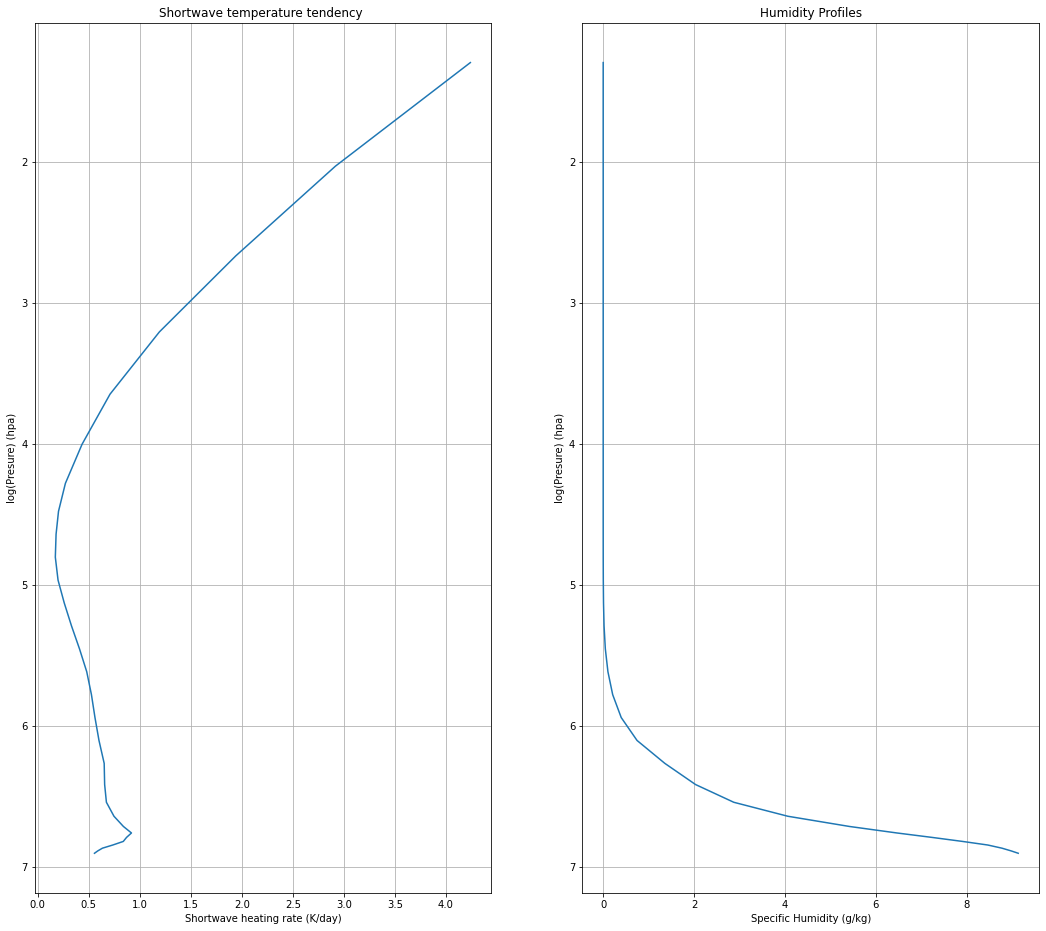

In [9]:
fig = plt.figure(figsize = (18,16))
ax = plt.subplot(1,2,1)
ax.plot(QRS_global,QRS_global.lev)
ax.set_xlabel('Shortwave heating rate (K/day)')
plt.title('Shortwave temperature tendency ')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()


ax = plt.subplot(1,2,2)
ax.plot(Q_global,Q_global.lev)
ax.set_xlabel('Specific Humidity (g/kg)')
ax.set_ylabel('log(Presure) (hpa)')
plt.title('Humidity Profiles')
plt.gca().invert_yaxis()
ax.grid()

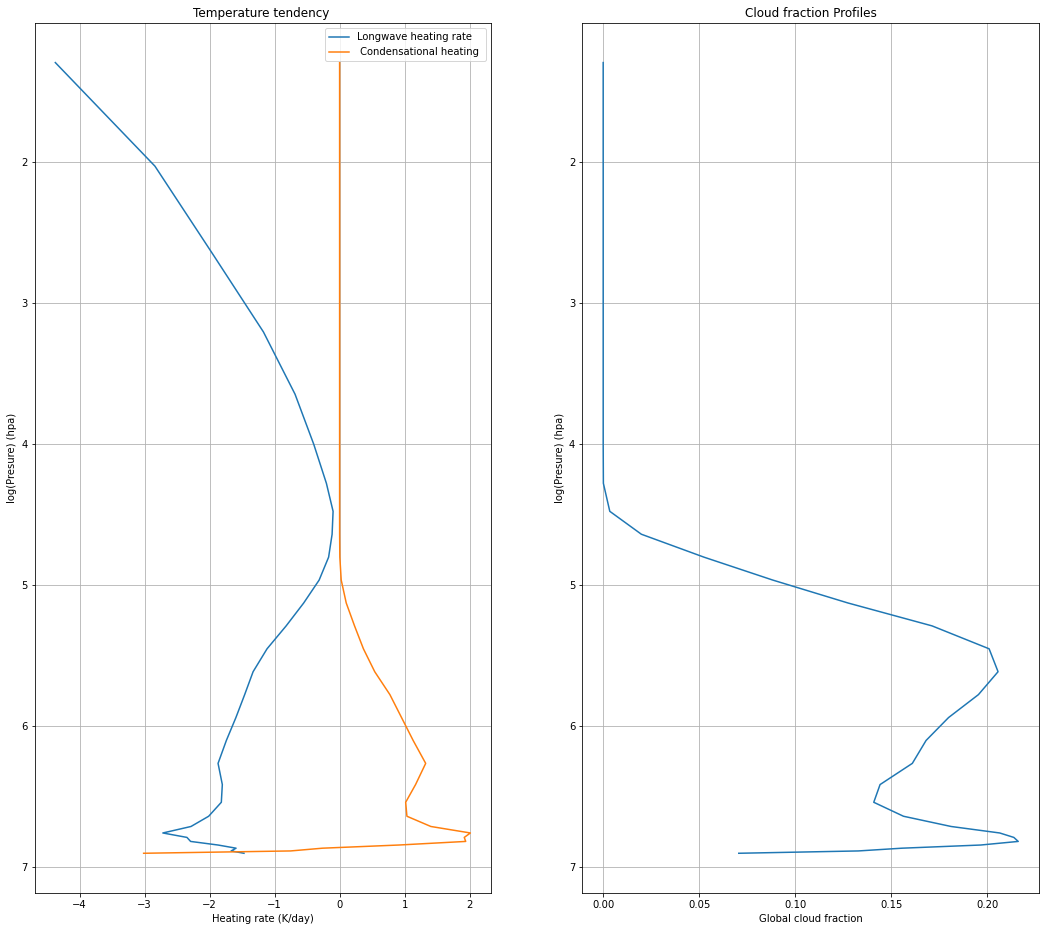

In [10]:
fig = plt.figure(figsize = (18,16))
ax = plt.subplot(1,2,1)
ax.plot(QRL_global,QRL_global.lev, label= 'Longwave heating rate ')
ax.plot(DTCOND_global,DTCOND_global.lev, label= ' Condensational heating ')
ax.set_xlabel('Heating rate (K/day)')
plt.title('Temperature tendency ')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()
ax.legend()


ax = plt.subplot(1,2,2)
ax.plot(C_global,C_global.lev)
ax.set_xlabel('Global cloud fraction')
ax.set_ylabel('log(Presure) (hpa)')
plt.title('Cloud fraction Profiles')
plt.gca().invert_yaxis()
ax.grid()


In [11]:
global_LHFLX = data.LHFLX.mean(dim='lon')
weights = np.cos(np.deg2rad(global_LHFLX.lat))/(np.cos(np.deg2rad(global_LHFLX.lat)).sum())
global_LHFLX = (global_LHFLX * weights ).sum()

global_SHFLX = data.SHFLX.mean(dim='lon')
weights = np.cos(np.deg2rad(global_SHFLX.lat))/(np.cos(np.deg2rad(global_SHFLX.lat)).sum())
global_SHFLX = (global_SHFLX * weights ).sum()

print('The Bowen ratio is {:.2}'.format(global_SHFLX.values/global_LHFLX.values ))


The Bowen ratio is 0.21


In [12]:
data=xr.load_dataset('Control.ann.012021.nc')
data=data.squeeze(dim='time')
data = data.drop('time')
data = data.mean(dim='lon')


data_shml = data.where((data.lat[:]>-60) & (data.lat[:]< -35), drop= True)
data_shml.assign_coords( lat= data.lat.where((data.lat[:]>-60) & (data.lat[:]< -35),drop= True))

data_itcz = data.where((data.lat[:]>0) & (data.lat[:]< 10), drop= True)
data_itcz.assign_coords( lat= data.lat.where((data.lat[:]>0) & (data.lat[:]< 10),drop= True))

data_nhst = data.where((data.lat[:]>15) & (data.lat[:]< 30), drop= True)
data_nhst.assign_coords( lat= data.lat.where((data.lat[:]>15) & (data.lat[:]< 30),drop= True))

data_arc = data.where((data.lat[:]>65) & (data.lat[:]< 90), drop= True)
data_arc.assign_coords( lat= data.lat.where((data.lat[:]>65) & (data.lat[:]< 90),drop= True))

data_dic={'Southern Hemisphere midlatitudes':data_shml, 'ITCZ ':data_itcz , 'Northern Hemisphere subtropics': data_nhst, 'Arctic':data_arc }



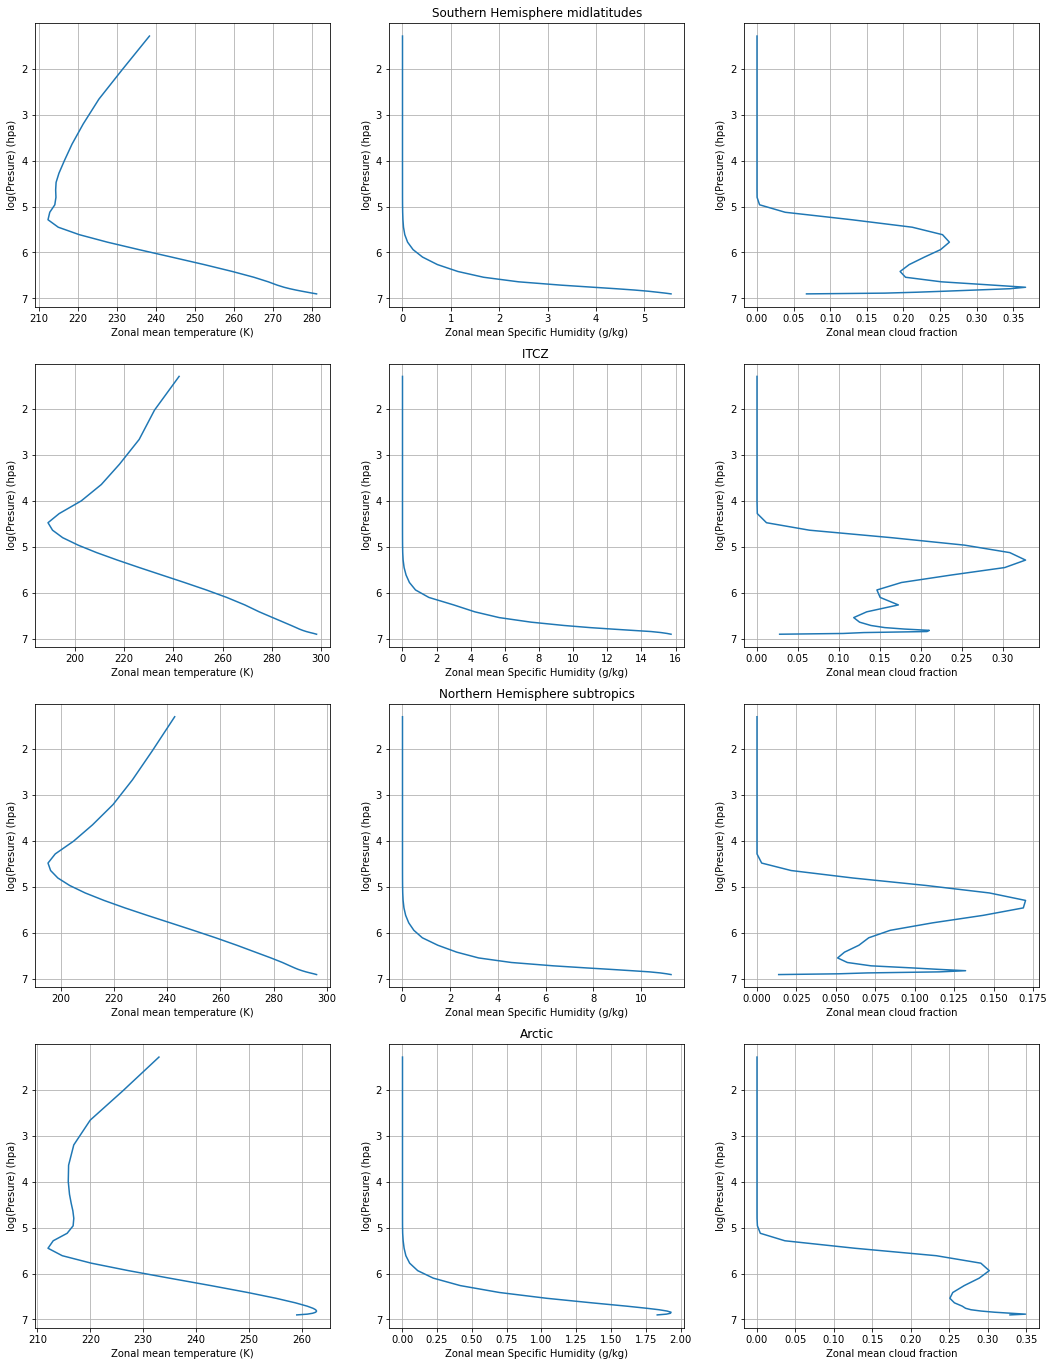

In [13]:
fig = plt.figure(figsize = (18,24))
i=0

for key, value in data_dic.items():

    T= value.T
    weights = np.cos(np.deg2rad(T.lat))/(np.cos(np.deg2rad(T.lat)).sum())
    T_global= T * weights
    T_global= T_global.sum(dim='lat')
    T_global = T_global.assign_coords(lev = np.log(T_global.lev) )

    Q = value.Q  * 1000
    weights = np.cos(np.deg2rad(Q.lat))/(np.cos(np.deg2rad(Q.lat)).sum())
    Q_global =  Q * weights
    Q_global = Q_global.sum(dim='lat')
    Q_global = Q_global.assign_coords(lev = np.log(Q_global.lev) )

    C = value.CLOUD 
    weights = np.cos(np.deg2rad(C.lat))/(np.cos(np.deg2rad(C.lat)).sum())
    C_global =  C * weights
    C_global = C_global.sum(dim='lat')
    C_global = C_global.assign_coords(lev = np.log(C_global.lev) )

    
    ax = plt.subplot(4,3,i+1)
    ax.plot(T_global,T_global.lev)
    ax.set_xlabel('Zonal mean temperature (K)')
    ax.set_ylabel('log(Presure) (hpa)')
    plt.gca().invert_yaxis()
    ax.grid()

    ax = plt.subplot(4,3,i+2)
    ax.plot(Q_global,Q_global.lev)
    ax.set_xlabel('Zonal mean Specific Humidity (g/kg)')
    ax.set_ylabel('log(Presure) (hpa)')
    plt.title(key)
    plt.gca().invert_yaxis()
    ax.grid()

    ax = plt.subplot(4,3,i+3)
    ax.plot(C_global,C_global.lev)
    ax.set_xlabel('Zonal mean cloud fraction')
    ax.set_ylabel('log(Presure) (hpa)')
    plt.gca().invert_yaxis()
    ax.grid()

    i = i+3

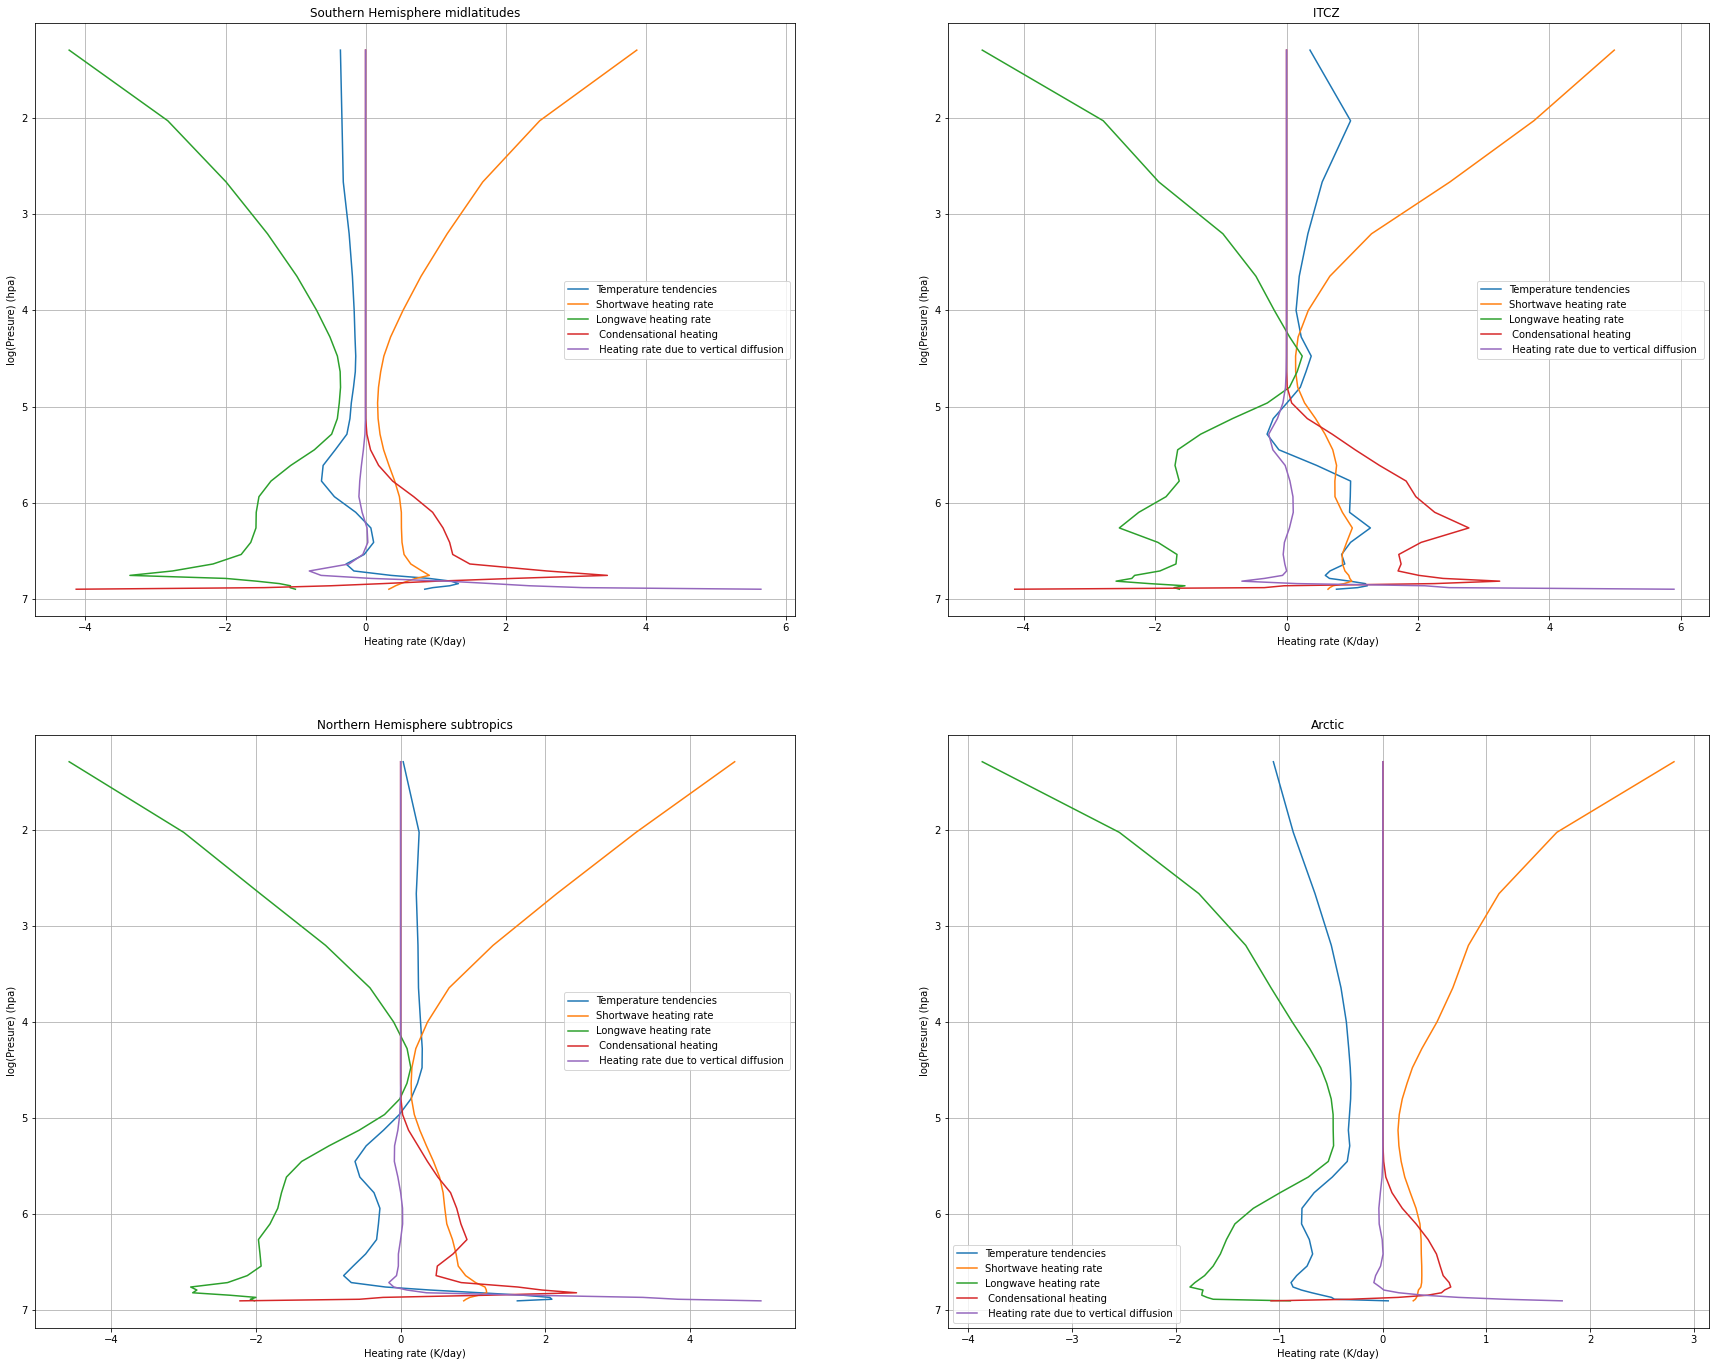

In [14]:
fig = plt.figure(figsize = (30,24))
i=1

for key, value in data_dic.items():

    QRL = value.QRL
    weights = np.cos(np.deg2rad(QRL.lat))/(np.cos(np.deg2rad(QRL.lat)).sum())
    QRL_global =  QRL * weights
    QRL_global = QRL_global.sum(dim='lat')
    QRL_global = QRL_global.assign_coords(lev = np.log(QRL_global.lev) )* 60*60*24


    QRS = value.QRS
    weights = np.cos(np.deg2rad(QRS.lat))/(np.cos(np.deg2rad(QRS.lat)).sum())
    QRS_global =  QRS * weights
    QRS_global = QRS_global.sum(dim='lat')
    QRS_global = QRS_global.assign_coords(lev = np.log(QRS_global.lev) )* 60*60*24


    DTCOND = value.DTCOND
    weights = np.cos(np.deg2rad(DTCOND.lat))/(np.cos(np.deg2rad(DTCOND.lat)).sum())
    DTCOND_global =  DTCOND * weights
    DTCOND_global = DTCOND_global.sum(dim='lat')
    DTCOND_global = DTCOND_global.assign_coords(lev = np.log(DTCOND_global.lev) )* 60*60*24


    DTV = value.DTV
    weights = np.cos(np.deg2rad(DTV.lat))/(np.cos(np.deg2rad(DTV.lat)).sum())
    DTV_global =  DTV * weights
    DTV_global = DTV_global.sum(dim='lat')
    DTV_global = DTV_global.assign_coords(lev = np.log(DTV_global.lev) )* 60*60*24


    TT= QRS_global + QRL_global + DTCOND_global + DTV_global 

    ax = plt.subplot(2,2,i)
    ax.plot(TT,TT.lev, label= 'Temperature tendencies')

    ax.plot(QRS_global,QRS_global.lev, label= 'Shortwave heating rate ')

    ax.plot(QRL_global,QRL_global.lev, label= 'Longwave heating rate ')

    ax.plot(DTCOND_global,DTCOND_global.lev, label= ' Condensational heating ')

    ax.plot(DTV_global,DTV_global.lev, label= ' Heating rate due to vertical diffusion ')

    ax.set_xlabel('Heating rate (K/day)')
    ax.set_ylabel('log(Presure) (hpa)')
    plt.title(key)
    plt.gca().invert_yaxis()
    ax.grid()
    ax.legend()

    i = i + 1


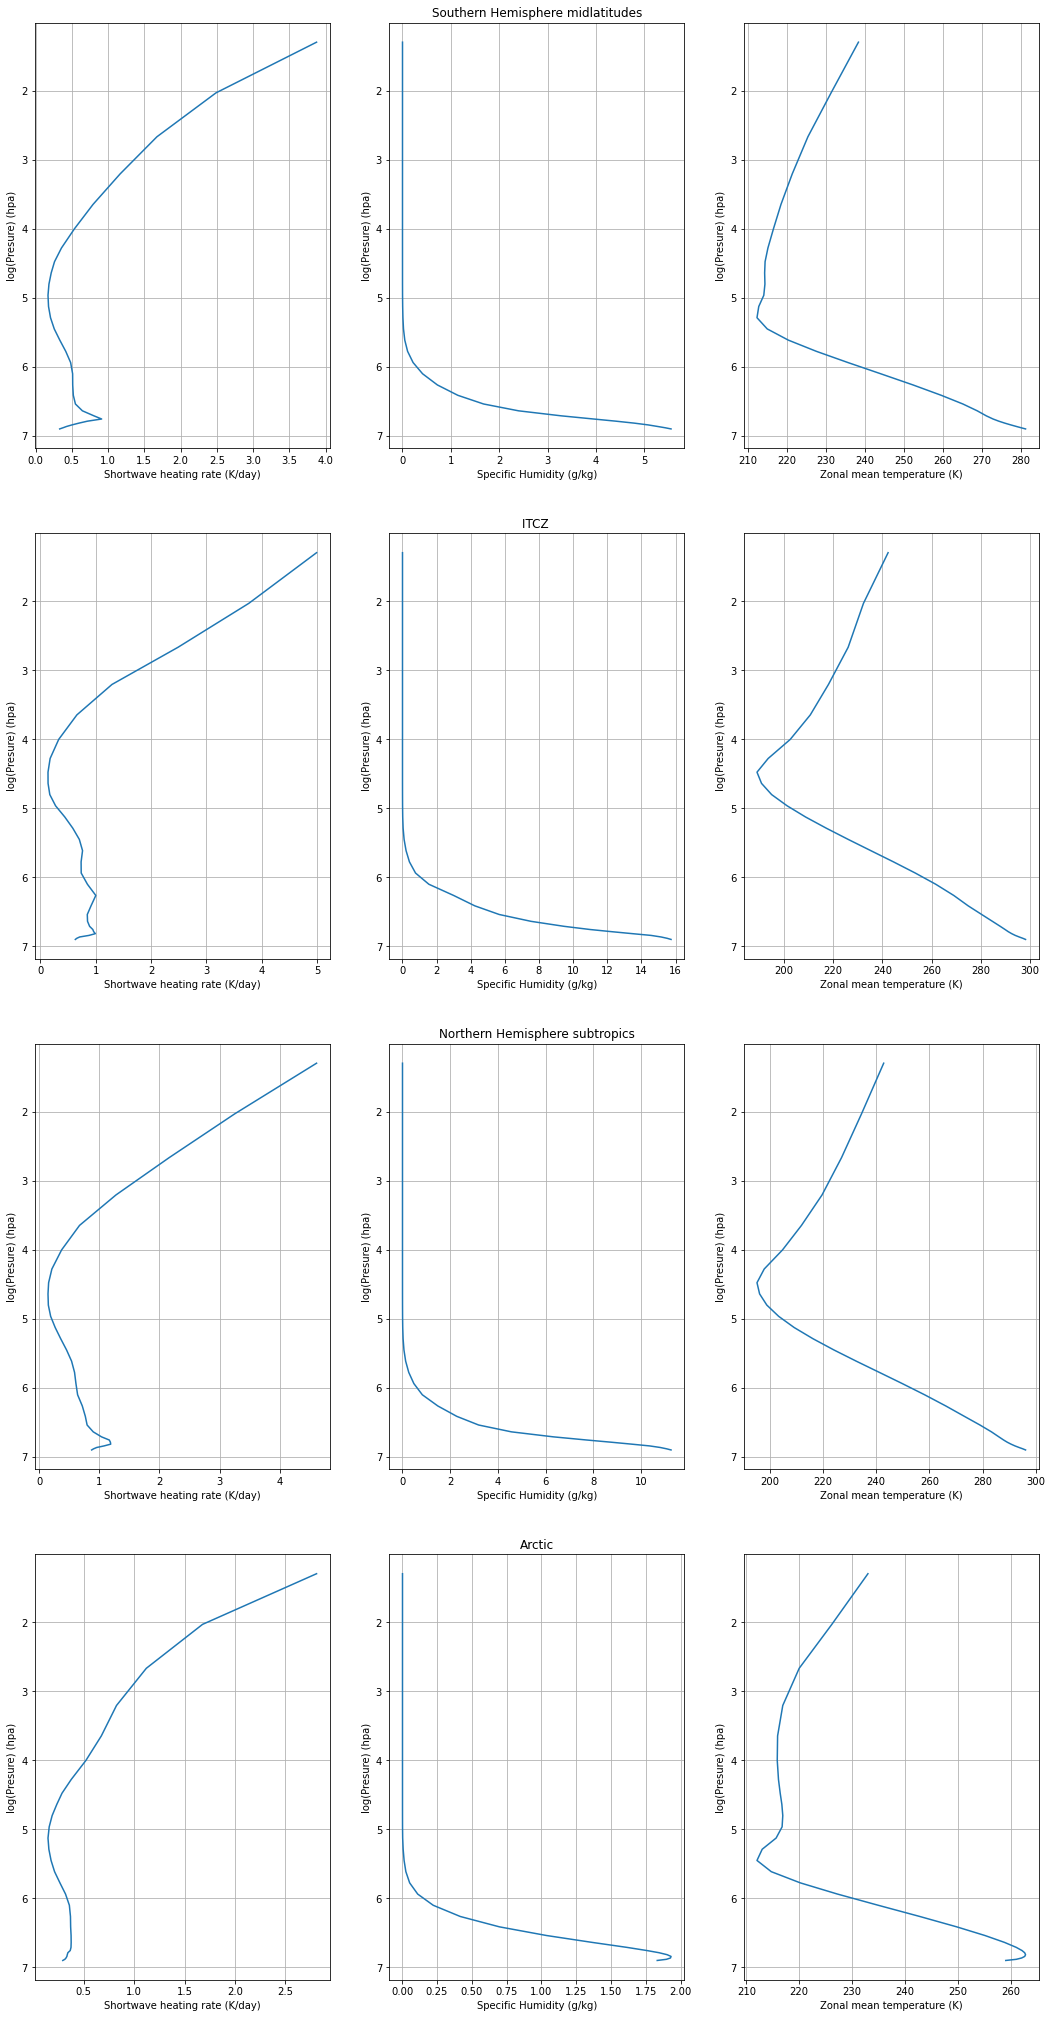

In [15]:
fig = plt.figure(figsize = (18,36))
i=0

for key, value in data_dic.items():


    QRS = value.QRS
    weights = np.cos(np.deg2rad(QRS.lat))/(np.cos(np.deg2rad(QRS.lat)).sum())
    QRS_global =  QRS * weights
    QRS_global = QRS_global.sum(dim='lat')
    QRS_global = QRS_global.assign_coords(lev = np.log(QRS_global.lev) )* 60*60*24

    T= value.T
    weights = np.cos(np.deg2rad(T.lat))/(np.cos(np.deg2rad(T.lat)).sum())
    T_global= T * weights
    T_global= T_global.sum(dim='lat')
    T_global = T_global.assign_coords(lev = np.log(T_global.lev) )

    Q = value.Q  * 1000
    weights = np.cos(np.deg2rad(Q.lat))/(np.cos(np.deg2rad(Q.lat)).sum())
    Q_global =  Q * weights
    Q_global = Q_global.sum(dim='lat')
    Q_global = Q_global.assign_coords(lev = np.log(Q_global.lev) )

    C = value.CLOUD 
    weights = np.cos(np.deg2rad(C.lat))/(np.cos(np.deg2rad(C.lat)).sum())
    C_global =  C * weights
    C_global = C_global.sum(dim='lat')
    C_global = C_global.assign_coords(lev = np.log(C_global.lev) )

    ax = plt.subplot(4,3,i+1)
    ax.plot(QRS_global,QRS_global.lev)
    ax.set_xlabel('Shortwave heating rate (K/day)')
    ax.set_ylabel('log(Presure) (hpa)')
    plt.gca().invert_yaxis()
    ax.grid()


    ax = plt.subplot(4,3,i+2)
    ax.plot(Q_global,Q_global.lev)
    ax.set_xlabel('Specific Humidity (g/kg)')
    ax.set_ylabel('log(Presure) (hpa)')
    plt.title(key)
    plt.gca().invert_yaxis()
    ax.grid()

    ax = plt.subplot(4,3,i+3)
    ax.plot(T_global,T_global.lev)
    ax.set_xlabel('Zonal mean temperature (K)')
    ax.set_ylabel('log(Presure) (hpa)')
    plt.gca().invert_yaxis()
    ax.grid()

    i = i + 3

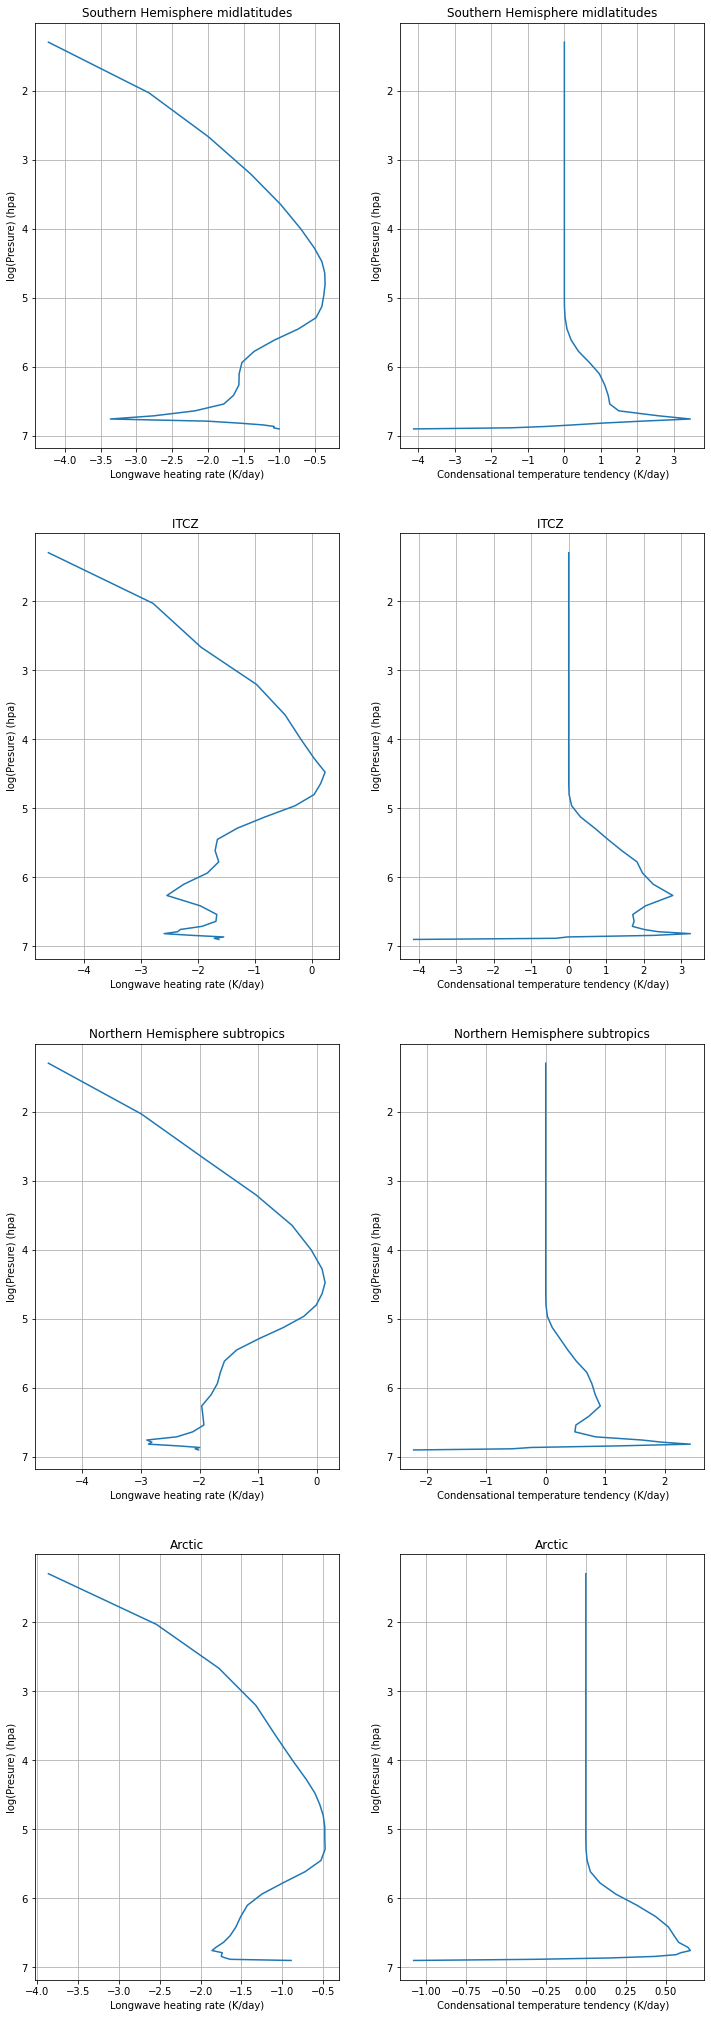

In [16]:
fig = plt.figure(figsize = (12,36))
i=0

for key, value in data_dic.items():


    QRL = value.QRL
    weights = np.cos(np.deg2rad(QRL.lat))/(np.cos(np.deg2rad(QRL.lat)).sum())
    QRL_global =  QRL * weights
    QRL_global = QRL_global.sum(dim='lat')
    QRL_global = QRL_global.assign_coords(lev = np.log(QRL_global.lev) )* 60*60*24

    DTCOND = value.DTCOND
    weights = np.cos(np.deg2rad(DTCOND.lat))/(np.cos(np.deg2rad(DTCOND.lat)).sum())
    DTCOND_global =  DTCOND * weights
    DTCOND_global = DTCOND_global.sum(dim='lat')
    DTCOND_global = DTCOND_global.assign_coords(lev = np.log(DTCOND_global.lev) )* 60*60*24


    ax = plt.subplot(4,2,i+1)
    ax.plot(QRL_global,QRL_global.lev)
    ax.set_xlabel('Longwave heating rate (K/day)')
    ax.set_ylabel('log(Presure) (hpa)')
    plt.gca().invert_yaxis()
    ax.grid()
    plt.title(key)

    ax = plt.subplot(4,2,i+2)
    ax.plot(DTCOND_global,DTCOND_global.lev)
    ax.set_xlabel(' Condensational temperature tendency (K/day)')
    ax.set_ylabel('log(Presure) (hpa)')
    plt.gca().invert_yaxis()
    ax.grid()
    plt.title(key)



    i = i + 2

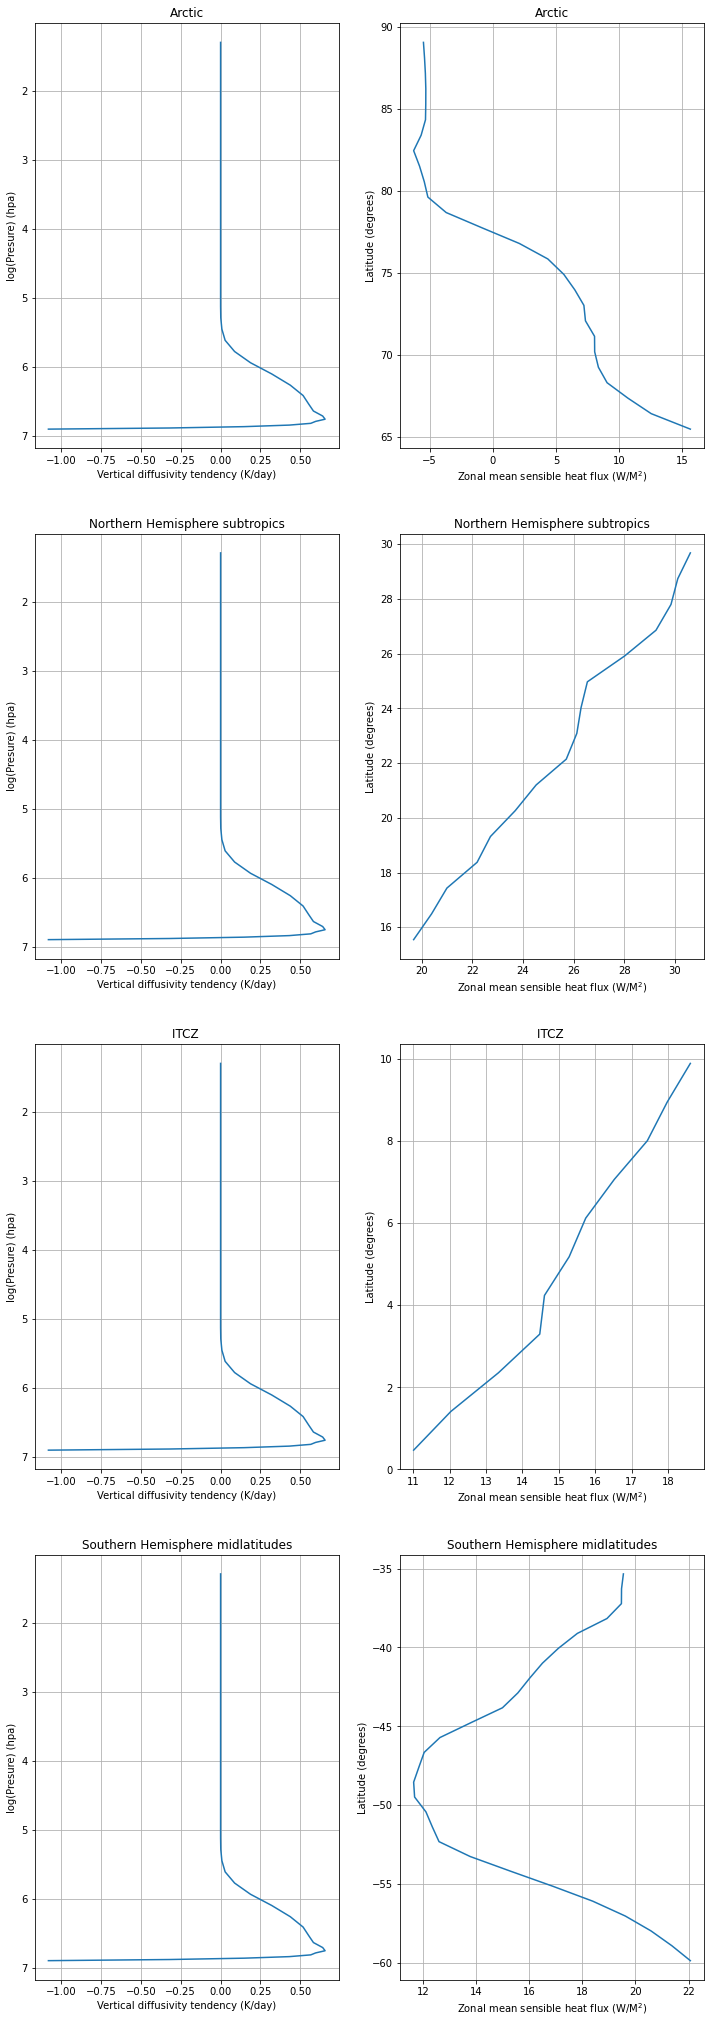

In [17]:
fig = plt.figure(figsize = (12,36))
i=8

for key, value in data_dic.items():


    DTV = value.DTV
    weights = np.cos(np.deg2rad(DTV.lat))/(np.cos(np.deg2rad(DTV.lat)).sum())
    DTV_global =  DTV * weights
    DTV_global = DTV_global.sum(dim='lat')
    DTV_global = DTV_global.assign_coords(lev = np.log(DTV_global.lev) )* 60*60*24


    SHFLX = value.SHFLX


    ax = plt.subplot(4,2,i)
    ax.plot(SHFLX,SHFLX.lat)
    ax.set_xlabel('Zonal mean sensible heat flux (W/M$^{2}$)')
    ax.set_ylabel('Latitude (degrees)')
    plt.gca().invert_yaxis()
    ax.grid()
    plt.title(key)
    plt.gca().invert_yaxis()

    ax = plt.subplot(4,2,i-1)
    ax.plot(DTCOND_global,DTCOND_global.lev)
    ax.set_xlabel('Vertical diffusivity tendency (K/day)')
    ax.set_ylabel('log(Presure) (hpa)')
    plt.gca().invert_yaxis()
    ax.grid()
    plt.title(key)



    i = i - 2

In [2]:
import climlab
from climlab import constants as const

In [18]:
T= data_nhst.T
weights = np.cos(np.deg2rad(T.lat))/(np.cos(np.deg2rad(T.lat)).sum())
T_global= T * weights
T_global= T_global.sum(dim='lat')


Q = data_nhst.Q  * 1000
weights = np.cos(np.deg2rad(Q.lat))/(np.cos(np.deg2rad(Q.lat)).sum())
Q_global =  Q * weights
Q_global = Q_global.sum(dim='lat')

profiles=[T_global, Q_global]
myprofiles = xr.concat(profiles, dim='vars').assign_coords(vars=['T','Q'])

myVarList2D = ["TS", "FSUTOA", "FSNTOA", "FLNT", "FSNS", "FLNS"]
profiles = []

for var in myVarList2D:
      ds= data_nhst[var]
      weights = np.cos(np.deg2rad(ds.lat))/(np.cos(np.deg2rad(ds.lat)).sum())
      ds_global= ds * weights
      ds_global= ds_global.sum(dim='lat')
      profiles.append(ds_global)

myprofiles2D = xr.concat(profiles, dim='vars').assign_coords(vars=myVarList2D )



In [19]:
#Set up the initial temperature state of our column radiative transfer model

mystate = climlab.column_state(num_lev=len(data_nhst.lev)) #same number of levels as our CESM1 output
mystate.Tatm[:] = np.array(myprofiles.sel(vars = 'T' ))  #Very specific way to put your own data into the state dictionary
mystate.Ts[:] = float(myprofiles2D.sel(vars = 'TS'))


In [20]:
radmodel = climlab.radiation.RRTMG(name='Radiation (all gases)', \
                                   specific_humidity=np.array(myprofiles.sel(vars = 'Q')),\
                                   state=mystate, albedo = 0.15,\
                                   timestep = climlab.constants.seconds_per_day)

radmodel.lev[:] = np.array(data_nhst.lev)
radmodel.insolation = float(myprofiles2D[1]+myprofiles2D[2])
radmodel.absorber_vmr['CO2'] = 284.e-6

Opened data from C:\ProgramData\Anaconda3\lib\site-packages\climlab\radiation\data\ozone\apeozone_cam3_5_54.nc


In [22]:
def get_tendencies(model):
    '''Pack all the subprocess tendencies into xarray.Datasets
    and convert to units of K / day'''
    tendencies_atm = xr.Dataset()
    tendencies_sfc = xr.Dataset()
    for name, proc, top_proc in climlab.utils.walk.walk_processes(model, topname='Total', topdown=False):
        tendencies_atm[name] = proc.tendencies['Tatm'].to_xarray()
        tendencies_sfc[name] = proc.tendencies['Ts'].to_xarray()
    for tend in [tendencies_atm, tendencies_sfc]:
        #  convert to K / day
        tend *= climlab.constants.seconds_per_day
    return tendencies_atm, tendencies_sfc


In [23]:
radmodel.compute_diagnostics()
( Tatm, Ts) = get_tendencies(radmodel)
orginal_model = climlab.to_xarray(radmodel.diagnostics)

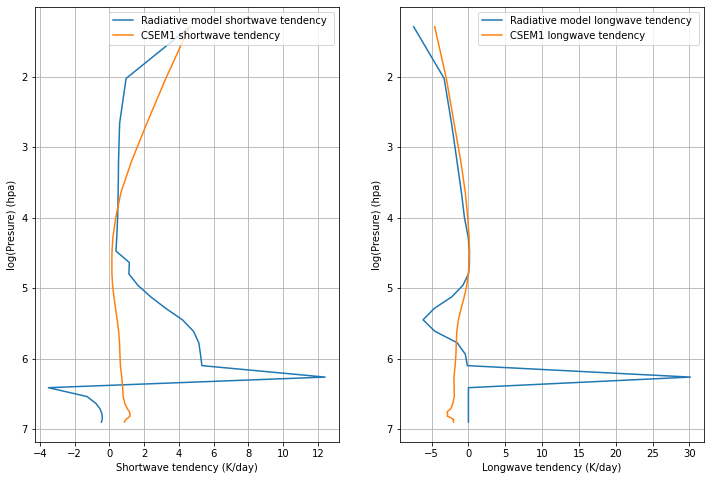

In [24]:
QRL = data_nhst.QRL
weights = np.cos(np.deg2rad(QRL.lat))/(np.cos(np.deg2rad(QRL.lat)).sum())
QRL_global =  QRL * weights
QRL_global = QRL_global.sum(dim='lat')
QRL_global = QRL_global.assign_coords(lev = np.log(QRL_global.lev) )* 60*60*24


QRS = data_nhst.QRS
weights = np.cos(np.deg2rad(QRS.lat))/(np.cos(np.deg2rad(QRS.lat)).sum())
QRS_global =  QRS * weights
QRS_global = QRS_global.sum(dim='lat')
QRS_global = QRS_global.assign_coords(lev = np.log(QRS_global.lev) )* 60*60*24

figure = plt.figure(figsize=(12,8))
,
ax = plt.subplot(1,2,1)
ax.plot(Tatm.SW,np.log(Tatm.lev), label= 'Radiative model shortwave tendency ')
ax.plot(QRS_global,QRS_global.lev, label= 'CSEM1 shortwave tendency ')

ax.legend()
ax.set_xlabel('Shortwave tendency (K/day)')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()

ax = plt.subplot(1,2,2)
ax.plot(Tatm.LW,np.log(Tatm.lev), label= 'Radiative model longwave tendency ')
ax.plot(QRL_global,QRL_global.lev, label= 'CSEM1 longwave tendency ')

ax.legend()
ax.set_xlabel('Longwave tendency (K/day)')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()



In [25]:
radmodel_2 = climlab.radiation.RRTMG(name='Radiation (all gases)', \
                                   specific_humidity=np.array(myprofiles.sel(vars = 'Q')/2),\
                                   state=mystate, albedo = 0.15,\
                                   timestep = climlab.constants.seconds_per_day)
#Specifying the vertical pressure levels to use in our radiation model.
radmodel_2.lev[:] = np.array(data_nhst.lev)
radmodel_2.insolation = float(myprofiles2D[1]+myprofiles2D[2])
radmodel_2.absorber_vmr['CO2'] = 284.e-6
radmodel_2.compute_diagnostics()
( Tatm_2, Ts_2) = get_tendencies(radmodel_2)
halfO2_model = climlab.to_xarray(radmodel_2.diagnostics)

Opened data from C:\ProgramData\Anaconda3\lib\site-packages\climlab\radiation\data\ozone\apeozone_cam3_5_54.nc


 Original model OLR at TOA [W/m2]: 1.4e+02 
 Half O2 model OLR at TOA : 1.5e+02 
 
 
 Original model ASR at TOA [W/m2]: 2.9e+02 
 Half O2 model ASR at TOA : 2.9e+02 
 

 Original model net SW at surface [W/m2]: 1.1e+02 
 Half O2 model net SW at surface : 6.3e+01 
 

 Original model net LW at surface [W/m2]: 1.2e+02 
 Half O2 model net LW at surface : 9.7e+01 
 
 


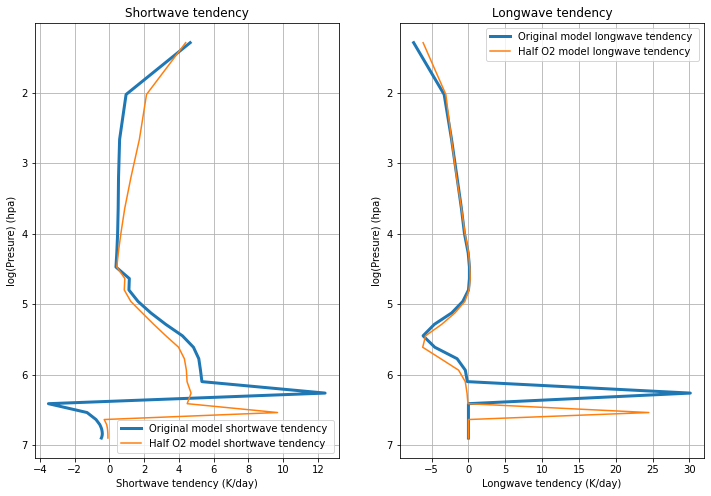

In [26]:

figure = plt.figure(figsize=(12,8))

ax = plt.subplot(1,2,1)
ax.plot(Tatm.SW,np.log(Tatm.lev), linewidth = 3, label= 'Original model shortwave tendency ')
ax.plot(Tatm_2.SW,np.log(Tatm_2.lev), label= 'Half O2 model shortwave tendency ')
plt.title('Shortwave tendency')
ax.legend()
ax.set_xlabel('Shortwave tendency (K/day)')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()

ax = plt.subplot(1,2,2)
ax.plot(Tatm.LW,np.log(Tatm.lev),linewidth = 3,  label= 'Original model longwave tendency ')
ax.plot(Tatm_2.LW,np.log(Tatm_2.lev), label= 'Half O2 model longwave tendency ')
plt.title('Longwave tendency')
ax.legend()
ax.set_xlabel('Longwave tendency (K/day)')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()


print(' Original model OLR at TOA [W/m2]: {:.2} \n Half O2 model OLR at TOA : {:.2} \n \n '.format(np.float(orginal_model.OLR.values),np.float(halfO2_model.OLR.values)))

print(' Original model ASR at TOA [W/m2]: {:.2} \n Half O2 model ASR at TOA : {:.2} \n \n'.format(np.float(orginal_model.ASR.values),np.float(halfO2_model.ASR.values)))

print(' Original model net SW at surface [W/m2]: {:.2} \n Half O2 model net SW at surface : {:.2} \n \n'.format(np.float(orginal_model.SW_sfc.values) ,np.float(halfO2_model.SW_sfc.values)))

print(' Original model net LW at surface [W/m2]: {:.2} \n Half O2 model net LW at surface : {:.2} \n \n '.format(np.float(orginal_model.LW_sfc.values) ,np.float(halfO2_model.LW_sfc.values)))



Opened data from C:\ProgramData\Anaconda3\lib\site-packages\climlab\radiation\data\ozone\apeozone_cam3_5_54.nc
 Original model OLR at TOA [W/m2]: 1.4e+02 
 Colder surface model OLR at TOA : 1.4e+02 
 
 
 Original model ASR at TOA [W/m2]: 2.9e+02 
 Colder surface model ASR at TOA : 2.9e+02 
 

 Original model net SW at surface [W/m2]: 1.1e+02 
 Colder surface model net SW at surface : 1.1e+02 
 

 Original model net LW at surface [W/m2]: 1.2e+02 
 Colder surface model net LW at surface : 9e+01 
 
 


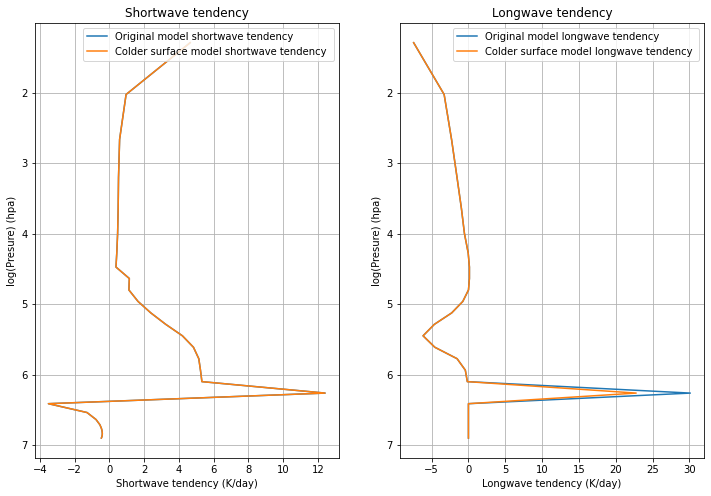

In [31]:
mystate = climlab.column_state(num_lev=len(data_nhst.lev)) #same number of levels as our CESM1 output
mystate.Tatm[:] = np.array(myprofiles.sel(vars = 'T' ))  #Very specific way to put your own data into the state dictionary
mystate.Ts[:] = float(myprofiles2D.sel(vars = 'TS')-5)

radmodel_2 = climlab.radiation.RRTMG(name='Radiation (all gases)', \
                                   specific_humidity=np.array(myprofiles.sel(vars = 'Q')),\
                                   state=mystate, albedo = 0.15,\
                                   timestep = climlab.constants.seconds_per_day)

radmodel_2.lev[:] = np.array(data_nhst.lev)
radmodel_2.insolation = float(myprofiles2D[1]+myprofiles2D[2])
radmodel_2.absorber_vmr['CO2'] = 284.e-6
radmodel_2.compute_diagnostics()
( Tatm_2, Ts_2) = get_tendencies(radmodel_2)
LowerSrf_model = climlab.to_xarray(radmodel_2.diagnostics)

figure = plt.figure(figsize=(12,8))

ax = plt.subplot(1,2,1)
ax.plot(Tatm.SW,np.log(Tatm.lev),  label= 'Original model shortwave tendency ')
ax.plot(Tatm_2.SW,np.log(Tatm_2.lev), label= 'Colder surface model shortwave tendency ')
plt.title('Shortwave tendency')
ax.legend()
ax.set_xlabel('Shortwave tendency (K/day)')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()

ax = plt.subplot(1,2,2)
ax.plot(Tatm.LW,np.log(Tatm.lev),  label= 'Original model longwave tendency ')
ax.plot(Tatm_2.LW,np.log(Tatm_2.lev), label= 'Colder surface model longwave tendency ')
plt.title('Longwave tendency')
ax.legend()
ax.set_xlabel('Longwave tendency (K/day)')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()


print(' Original model OLR at TOA [W/m2]: {:.2} \n Colder surface model OLR at TOA : {:.2} \n \n '.format(np.float(orginal_model.OLR.values),np.float(LowerSrf_model.OLR.values)))

print(' Original model ASR at TOA [W/m2]: {:.2} \n Colder surface model ASR at TOA : {:.2} \n \n'.format(np.float(orginal_model.ASR.values),np.float(LowerSrf_model.ASR.values)))

print(' Original model net SW at surface [W/m2]: {:.2} \n Colder surface model net SW at surface : {:.2} \n \n'.format(np.float(orginal_model.SW_sfc.values) ,np.float(LowerSrf_model.SW_sfc.values)))

print(' Original model net LW at surface [W/m2]: {:.2} \n Colder surface model net LW at surface : {:.2} \n \n '.format(np.float(orginal_model.LW_sfc.values) ,np.float(LowerSrf_model.LW_sfc.values)))


Opened data from C:\ProgramData\Anaconda3\lib\site-packages\climlab\radiation\data\ozone\apeozone_cam3_5_54.nc
 Original model OLR at TOA [W/m2]: 1.4e+02 
 Colder Atm. model OLR at TOA : 1.3e+02 
 
 
 Original model ASR at TOA [W/m2]: 2.9e+02 
 Colder Atm. model ASR at TOA : 2.9e+02 
 

 Original model net SW at surface [W/m2]: 1.1e+02 
 Colder Atm. model net SW at surface : 1.1e+02 
 

 Original model net LW at surface [W/m2]: 1.2e+02 
 Colder Atm. model net LW at surface : 1.4e+02 
 
 


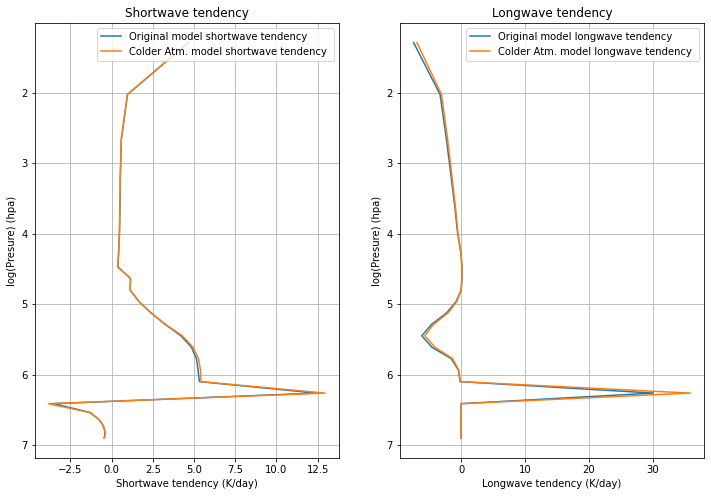

In [30]:
mystate = climlab.column_state(num_lev=len(data_nhst.lev)) 
mystate.Tatm[:] = np.array(myprofiles.sel(vars = 'T' )-5) 
mystate.Ts[:] = float(myprofiles2D.sel(vars = 'TS'))

radmodel_2 = climlab.radiation.RRTMG(name='Radiation (all gases)', \
                                   specific_humidity=np.array(myprofiles.sel(vars = 'Q')),\
                                   state=mystate, albedo = 0.15,\
                                   timestep = climlab.constants.seconds_per_day)

radmodel_2.lev[:] = np.array(data_nhst.lev)
radmodel_2.insolation = float(myprofiles2D[1]+myprofiles2D[2])
radmodel_2.absorber_vmr['CO2'] = 284.e-6
radmodel_2.compute_diagnostics()
( Tatm_2, Ts_2) = get_tendencies(radmodel_2)
LowerAtm_model = climlab.to_xarray(radmodel_2.diagnostics)

figure = plt.figure(figsize=(12,8))

ax = plt.subplot(1,2,1)
ax.plot(Tatm.SW,np.log(Tatm.lev) , label= 'Original model shortwave tendency ')
ax.plot(Tatm_2.SW,np.log(Tatm_2.lev), label= 'Colder Atm. model shortwave tendency ')
plt.title('Shortwave tendency')
ax.legend()
ax.set_xlabel('Shortwave tendency (K/day)')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()

ax = plt.subplot(1,2,2)
ax.plot(Tatm.LW,np.log(Tatm.lev),  label= 'Original model longwave tendency ')
ax.plot(Tatm_2.LW,np.log(Tatm_2.lev), label= 'Colder Atm. model longwave tendency ')
plt.title('Longwave tendency')
ax.legend()
ax.set_xlabel('Longwave tendency (K/day)')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()


print(' Original model OLR at TOA [W/m2]: {:.2} \n Colder Atm. model OLR at TOA : {:.2} \n \n '.format(np.float(orginal_model.OLR.values),np.float(LowerAtm_model.OLR.values)))

print(' Original model ASR at TOA [W/m2]: {:.2} \n Colder Atm. model ASR at TOA : {:.2} \n \n'.format(np.float(orginal_model.ASR.values),np.float(LowerAtm_model.ASR.values)))

print(' Original model net SW at surface [W/m2]: {:.2} \n Colder Atm. model net SW at surface : {:.2} \n \n'.format(np.float(orginal_model.SW_sfc.values) ,np.float(LowerAtm_model.SW_sfc.values)))

print(' Original model net LW at surface [W/m2]: {:.2} \n Colder Atm. model net LW at surface : {:.2} \n \n '.format(np.float(orginal_model.LW_sfc.values) ,np.float(LowerAtm_model.LW_sfc.values)))


In [ ]:
radmodel.integrate_years(2.)

figure = plt.figure(figsize=(12,4))
ax.plot(radmodel.Tatm,np.log(radmodel.lev), label= 'Radiative model equilibrium temperature profile ')
ax.plot(myprofiles.sel(vars= 'T'),np.log(radmodel.lev), label= 'CSEM1 temperature profile ')

ax.legend()
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('log(Presure) (hpa)')
plt.gca().invert_yaxis()
ax.grid()


In [94]:
radmodel.lev


array([  3.64346569,   7.59481965,  14.35663225,  24.61222   ,
        38.26829977,  54.59547974,  72.01245055,  87.82123029,
       103.31712663, 121.54724076, 142.99403876, 168.22507977,
       197.9080867 , 232.82861896, 273.91081676, 322.24190235,
       379.10090387, 445.9925741 , 524.68717471, 609.77869481,
       691.38943031, 763.40448111, 820.85836865, 859.53476653,
       887.02024892, 912.64454694, 936.19839847, 957.48547954,
       976.32540739, 992.55609512])